# IST 317 Machine Learning

## Spring 2019

### Chapter 3 homework: credit card fraud detection

#### Your name(s) here

In this assignment, you will train some classifiers to try to detect a fraudulent transaction, based on several predictors. The dataset is provided, in the file named creditcard.csv. Each row represents a transaction, with 28 predictors, the amount of the transaction, and a class: 0 for suspected fraud, 1 for a good transaction.

In [34]:
# Load the file into a Pandas dataframe and display the frame
%matplotlib inline

import pandas as pd

card_full = pd.read_csv('creditcard.csv')
card_full

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [35]:
# look at the frame's metadata to see the types of the columns, 
# and if there is any missing data

card_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
# examine the characteristics of the numerical data

card_full.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


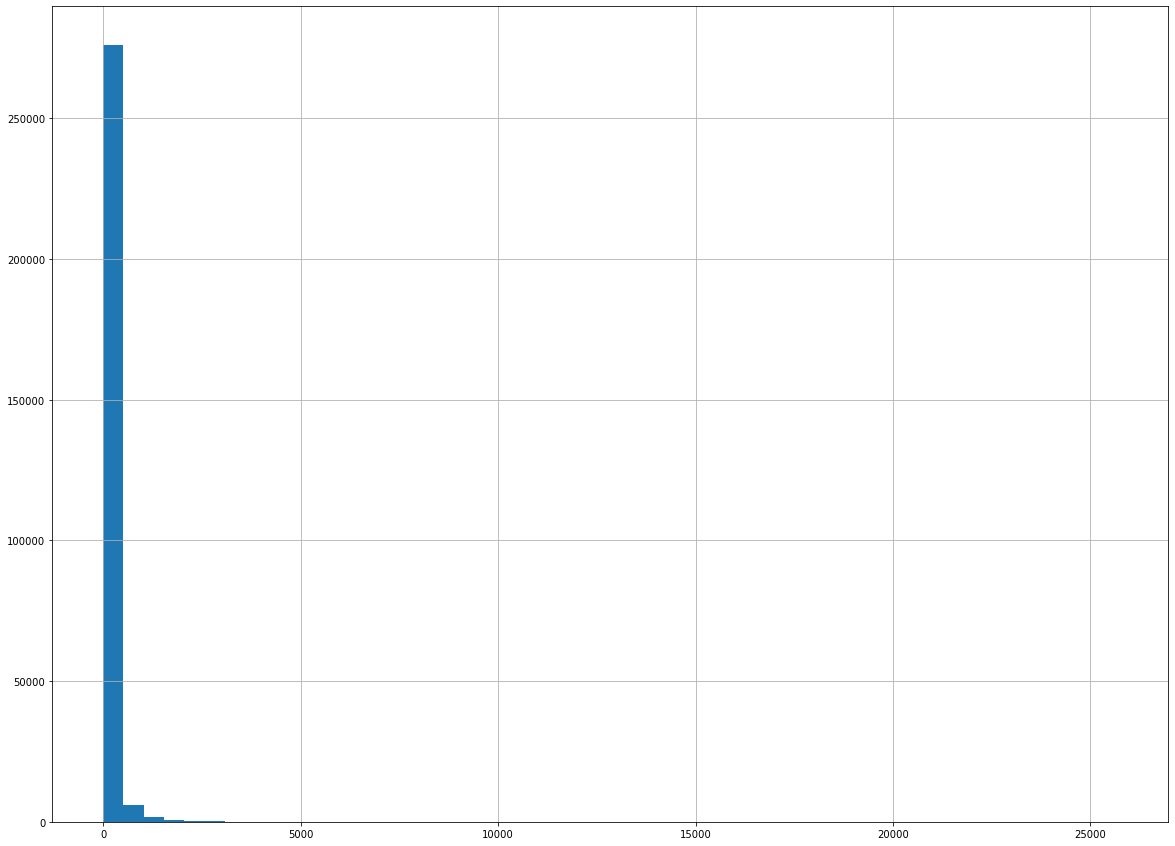

In [37]:
# create a histogram of the Amount class

import matplotlib.pyplot as plt

card_full['Amount'].hist(bins=50, figsize=(20, 15))
plt.show()

# About that histogram

What does the histogram tell you about how the Amount feature is distributed? What, if anything, should you do to the data, based on the histogram? Edit this Markdown cell and type your answer here: Amount Feature is overwhelmingly distributed to the left. I would probably decrease the max value and increase bin size.


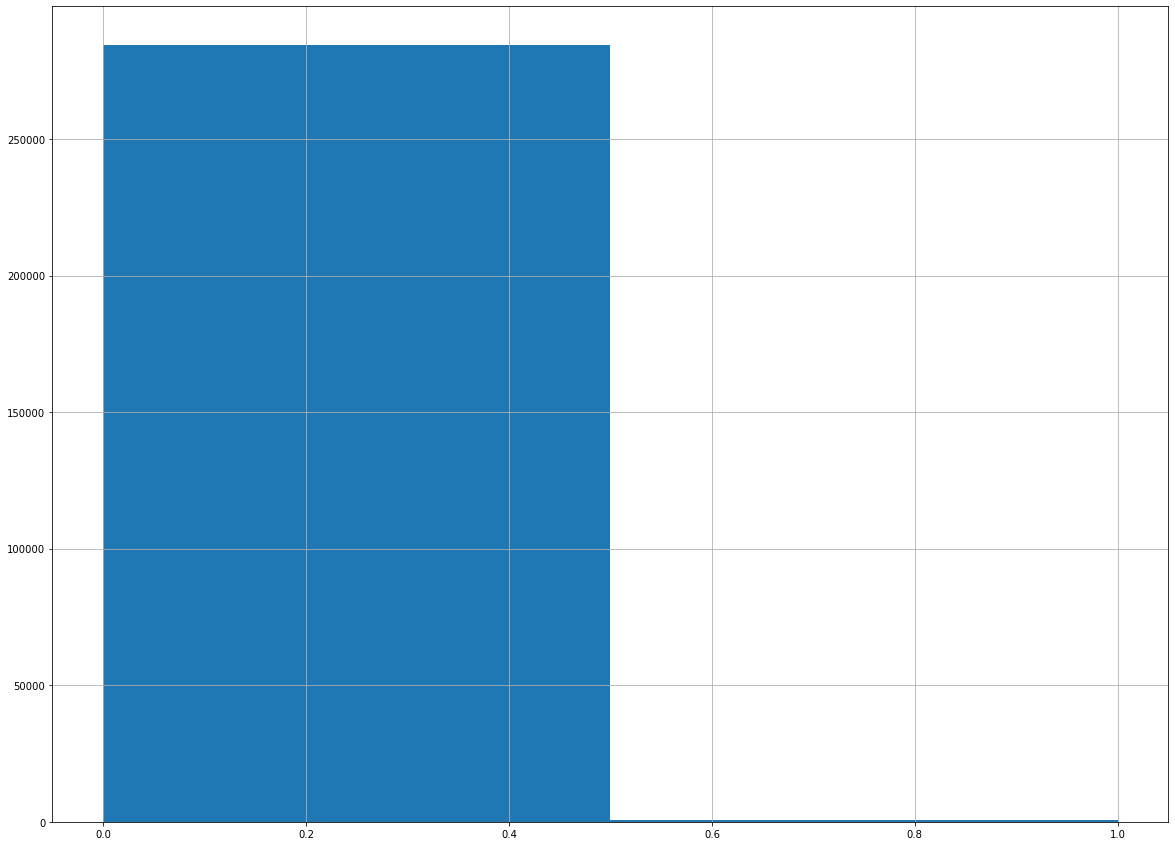

In [38]:
# Now, create a histogram of the Class field 
# (i.e., the labels - is class field flgged as fradulant or not)
#0 not fraudulant and 1 is fradulent 

#Shows us a histogram of the class field to see easily see the proportion between fradulent and non-fradulent transactions.
card_full['Class'].hist(bins=2, figsize=(20, 15))
plt.show()


In [39]:
# Now, look at the value_counts() for the Class feature, to 
# gain further insight

#Shows exactly how many transactions are fraudulant v.s. not fraudulant
card_full['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# About *that* histogram and data

What does the histogram of the labels tell you? Write your answer here: 

The histogram of labels tell us that, in most cases, the credit card transaction is not fraudulent.

This information tells us that if we were to randomly select a piece of data from the file, it most likely would not be fraudulant. We want to be able to select data that is actually fradulant in order to have a proportion that will truely represent the data. This is so we can make accurate predictions.

# Split and prepare the data

In the following cells, split the data into test and training data, and perform any preprocessing before training ML models. 


In [40]:
# split data into training and testing sets, and then examine the
# value_counts() for the training and testing sets, to make sure
# each set is representative of the whole dataset

#places 20 percent of the data into a dataframe for testing and 80% of the data into a separate data frame for training
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=68333)
for train_index, test_index in split.split(card_full, card_full['Class']):
    
     #create dataframes for holding the data
    train_set = card_full.loc[train_index]
    test_set = card_full.loc[test_index]

print(train_set['Class'].value_counts())
print(test_set['Class'].value_counts())

0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


In [41]:
# separate the predictors from the labels in the training set

#Drop the Class field from the training set 
card = train_set.drop('Class', axis=1)

#create a copy of the Class field from the training set 
card_labels = train_set['Class'].copy()

In [42]:
# create transformation pipleline(s) to prepare the training data for use in 
# a ML algorithm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#creates a pipeline to make the process time of performing transformations that prepare the data faster
#scale the data
full_pipeline = Pipeline([
    ('std_scaler', StandardScaler())])  

#fit and transform the dataset 
#The pipeline will make the process time shorter
card_train_prepared = full_pipeline.fit_transform(card)

# Train a classifier on the data

In the cell below, train a SGD classifier to detect credit card fraud.


In [43]:
# create and train the SGD classifier
from sklearn.linear_model import SGDClassifier

#SDG is like Gradient Decent but only looks at random sample per mini-batch.
#n_jobs = -1 specifies the number of cores to use for key machine learning tasks. set to -1 means all CPUs are used 
sgd_clf = SGDClassifier(random_state = 42, n_jobs=-1)
sgd_clf.fit(card_train_prepared, card_labels)

SGDClassifier(n_jobs=-1, random_state=42)

In [44]:
# perform cross-validation to evaluate the quality of the model
from sklearn.model_selection import cross_val_score

#check how accurate the model is at predicting
print(cross_val_score(sgd_clf, card_train_prepared, card_labels, cv=3, scoring='accuracy', n_jobs=-1))

[0.99918366 0.99913098 0.99893348]


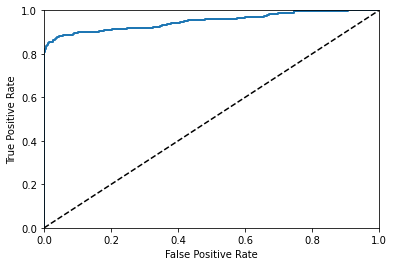

In [45]:
# prepare and plot the ROC curve to visualize the quality of the model

from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

#make a prediction on if the charge is fraudulant or not
y_scores = cross_val_predict(sgd_clf, card_train_prepared, card_labels, cv=3, method="decision_function", n_jobs=-1)

# calculate the ROC curve points for the SGD classifier
#comparing what the labels are to what the model found.
#the predictions vs actual labels on a ROC_curve
fpr, tpr, thresholds = roc_curve(card_labels, y_scores)

'''
 * Function to plot the ROC curve
'''
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
# plot the curve   
plot_roc_curve(fpr, tpr)
plt.show()



# And then another classifier

In the cells below, train and evaluate a Random Forest classifier to detect credit card fraud.
https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376/3 

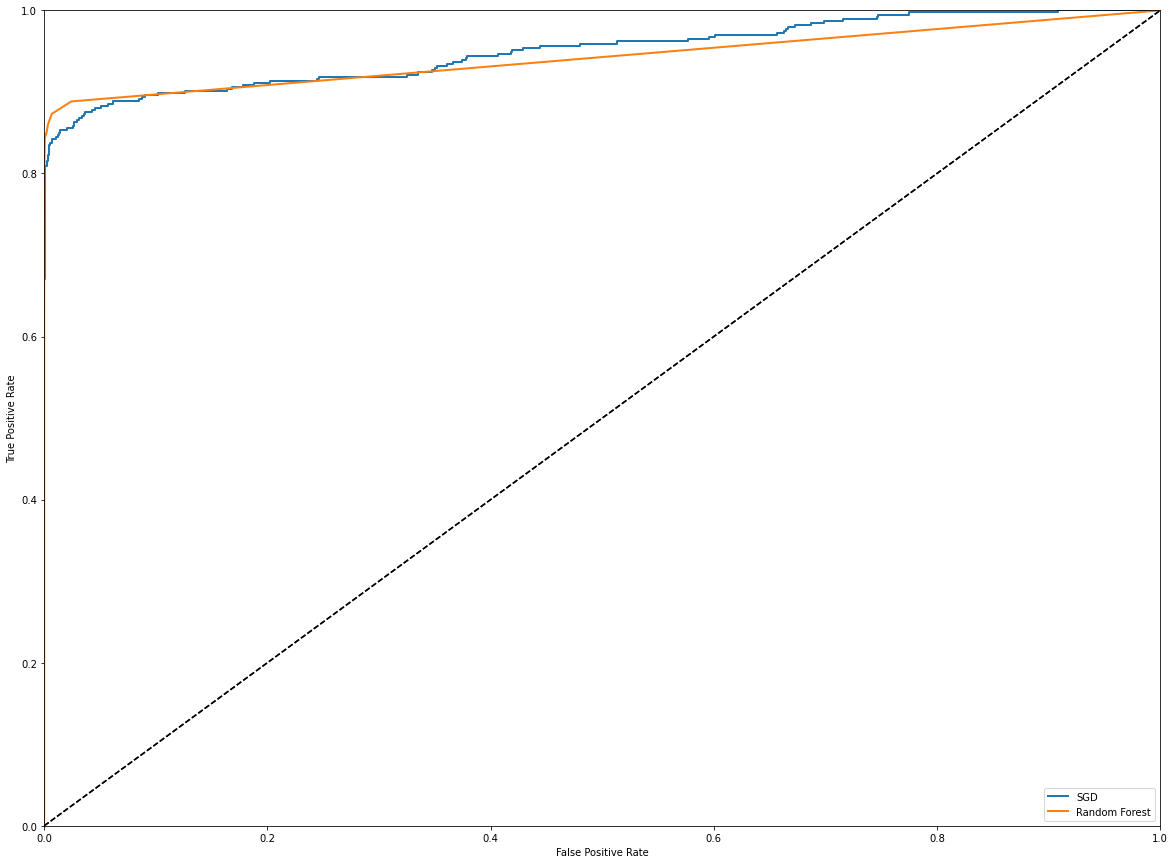

In [47]:
# train the RandomForestClassifier, and then plot it's ROC 
# curve along with the SGD classifier's curve

from sklearn.ensemble import RandomForestClassifier

# train a Random Forest Classifier
forest_clf = RandomForestClassifier(random_state = 68333, n_jobs = -1)

# predict the probability that the charge is fradulent
y_probas_forest = cross_val_predict(forest_clf, card_train_prepared, card_labels, 
                                   cv=3, method='predict_proba', n_jobs = -1)

# We need one score per instance to do the ROC curve, so we will
# just take the positive probability value from each pair. Gives the probability of being fradulent
y_scores_forest = y_probas_forest[:,1]

# calculate the ROC curve points and display the results,
# against the SGD classifier
fpr_forest, tpr_forest, thresholds_forest = roc_curve(card_labels, y_scores_forest)

plt.rcParams['figure.figsize'] = (20, 15)
plot_roc_curve(fpr, tpr, 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')

plt.show()


In [32]:
# Now, display the area under the ROC curve for both 
# models

from sklearn.metrics import roc_auc_score

print('SGD area under ROC curve:', roc_auc_score(card_labels, y_scores))
print('RF area under ROC curve:', roc_auc_score(card_labels, y_scores_forest))

SGD area under ROC curve: 0.9502140216645536
RF area under ROC curve: 0.9424420905561475


# Wrapping up

Which of your current models is the best predictor of credit card fraud? Why do you say that? Write your answer below:


In [ ]:
#SDG because it has a better AUC score and it better detects whether a transaction is fradulent. 